In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime
from scipy.stats import mode

In [80]:
n = 27200000 #number of records in file
s = 250000 #desired sample size
filename = 'nyc_bikeshare.csv'
skip = sorted(random.sample(range(n),n-s))
skip.pop(0)

0

In [81]:
df1 = pd.read_csv(filename, skiprows=skip)

In [82]:
df1

tripduration          starttime           stoptime  start_station_id  \
0                899  06-01-13 00:09:25  06-01-13 00:24:24             494.0   
1                206  06-01-13 00:22:32  06-01-13 00:25:58             509.0   
2                492  06-01-13 01:21:54  06-01-13 01:30:06              82.0   
3                737  06-01-13 08:14:11  06-01-13 08:26:28              72.0   
4               3626  06-01-13 08:43:12  06-01-13 09:43:38             447.0   
...              ...                ...                ...               ...   
265332           665  11-30-19 23:58:27  12-01-19 00:09:32            3711.0   
265333           265  11-30-19 23:58:46  12-01-19 00:03:12             116.0   
265334           192  11-30-19 23:58:49  12-01-19 00:02:01             503.0   
265335           534  11-30-19 23:59:07  12-01-19 00:08:01             251.0   
265336           269  11-30-19 23:59:14  12-01-19 00:03:43            3534.0   

        end_station_id  bikeid  usertype  birthyear  gender  
0                494.0   15539       1.0     1967.0       1  
1                462.0   15954       1.0     1971.0       1  
2                242.0   17637       1.0     1984.0       1  
3                448.0   17548       1.0     1984.0       2  
4                423.0   20302       0.0        NaN       0  
...                ...     ...       ...        ...     ...  
265332           442.0   40402       1.0     1992.0       1  
265333           462.0   39333       1.0     1995.0       1  
265334           297.0   15543       1.0     1966.0       2  
265335           302.0   33020       1.0     1996.0       2  
265336          3509.0   35136       1.0     1974.0       1  

[265337 rows x 9 columns]

In [83]:
df1['starttime'] = pd.to_datetime(df1['starttime'])
df1['stoptime'] = pd.to_datetime(df1['stoptime'])
df1.dtypes

tripduration                 int64
starttime           datetime64[ns]
stoptime            datetime64[ns]
start_station_id           float64
end_station_id             float64
bikeid                       int64
usertype                   float64
birthyear                  float64
gender                       int64
dtype: object

In [84]:
df1

tripduration           starttime            stoptime  \
0                899 2013-06-01 00:09:25 2013-06-01 00:24:24   
1                206 2013-06-01 00:22:32 2013-06-01 00:25:58   
2                492 2013-06-01 01:21:54 2013-06-01 01:30:06   
3                737 2013-06-01 08:14:11 2013-06-01 08:26:28   
4               3626 2013-06-01 08:43:12 2013-06-01 09:43:38   
...              ...                 ...                 ...   
265332           665 2019-11-30 23:58:27 2019-12-01 00:09:32   
265333           265 2019-11-30 23:58:46 2019-12-01 00:03:12   
265334           192 2019-11-30 23:58:49 2019-12-01 00:02:01   
265335           534 2019-11-30 23:59:07 2019-12-01 00:08:01   
265336           269 2019-11-30 23:59:14 2019-12-01 00:03:43   

        start_station_id  end_station_id  bikeid  usertype  birthyear  gender  
0                  494.0           494.0   15539       1.0     1967.0       1  
1                  509.0           462.0   15954       1.0     1971.0       1  
2                   82.0           242.0   17637       1.0     1984.0       1  
3                   72.0           448.0   17548       1.0     1984.0       2  
4                  447.0           423.0   20302       0.0        NaN       0  
...                  ...             ...     ...       ...        ...     ...  
265332            3711.0           442.0   40402       1.0     1992.0       1  
265333             116.0           462.0   39333       1.0     1995.0       1  
265334             503.0           297.0   15543       1.0     1966.0       2  
265335             251.0           302.0   33020       1.0     1996.0       2  
265336            3534.0          3509.0   35136       1.0     1974.0       1  

[265337 rows x 9 columns]

In [85]:
df1['date_minus_time'] = df1["starttime"].apply( lambda df1 : 
datetime(year=df1.year, month=df1.month, day=df1.day))	
df1.set_index(df1["date_minus_time"], inplace=True)

In [86]:
resampled_df = pd.DataFrame()
resampled_df['tripduration'] = df1['tripduration'].resample('D').mean()
resampled_df['birthyear'] = df1['birthyear'].resample('D').mean()
resampled_df['gender'] = df1['gender'].resample('D').mean() #mode()
resampled_df['usertype'] = df1['usertype'].resample('D').mean()
resampled_df['tripcnt'] = df1['tripduration'].resample('D').count()

In [87]:
resampled_df = resampled_df.dropna()
date_before_limit = pd.Timestamp(2019, 11, 27)
resampled_df = resampled_df[resampled_df.index < date_before_limit]
resampled_df

tripduration    birthyear    gender  usertype  tripcnt
date_minus_time                                                        
2013-06-01        4402.666667  1975.000000  0.696970  0.636364       33
2013-06-02        2100.918367  1975.380952  0.530612  0.428571       49
2013-06-03        3156.615385  1968.529412  0.769231  0.653846       26
2013-06-04        1131.418605  1969.666667  0.651163  0.558140       43
2013-06-05        1368.852941  1970.850000  0.705882  0.588235       34
...                       ...          ...       ...       ...      ...
2019-11-22         688.500000  1980.688406  1.144928  0.942029      138
2019-11-23         815.354167  1978.895833  1.125000  0.864583       96
2019-11-24         688.565217  1980.652174  1.065217  0.826087       46
2019-11-25         625.905109  1979.510949  1.182482  0.927007      137
2019-11-26         806.835443  1979.145570  1.253165  0.924051      158

[2361 rows x 5 columns]

In [88]:
date_before = pd.Timestamp(2013, 12, 27)
df2013 = resampled_df[resampled_df.index < date_before]

Text(0, 0.5, 'Trip count per day')

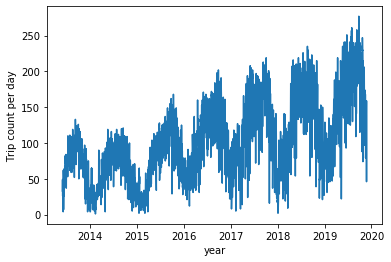

In [89]:
plt.plot(resampled_df.index, resampled_df['tripcnt'])
plt.xlabel('year')
plt.ylabel('Trip count per day')

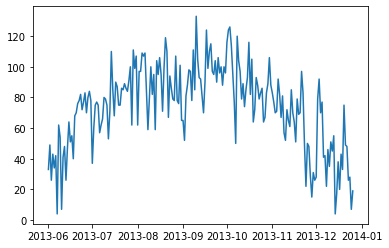

In [90]:
plt.plot(df2013.index, df2013['tripcnt'])

In [91]:
df_monthly = pd.DataFrame()
df_monthly['tripduration'] = resampled_df['tripduration'].resample('M').mean()
df_monthly['birthyear'] = resampled_df['birthyear'].resample('M').mean()
df_monthly['gender'] = resampled_df['gender'].resample('M').mean() #mode()
df_monthly['usertype'] = resampled_df['usertype'].resample('M').mean()
df_monthly['tripcnt'] = resampled_df['tripcnt'].resample('M').sum()
df_monthly

tripduration    birthyear    gender  usertype  tripcnt
date_minus_time                                                        
2013-06-30        2013.403824  1974.613806  0.708417  0.588866     1644
2013-07-31         999.071457  1975.787243  0.984031  0.790951     2457
2013-08-31         963.143343  1975.697590  1.011883  0.814616     2770
2013-09-30         947.109297  1976.279654  1.065092  0.855157     2839
2013-10-31         797.992801  1975.729851  1.129002  0.904525     2809
...                       ...          ...       ...       ...      ...
2019-07-31        1022.160402  1980.519837  1.146802  0.822569     5881
2019-08-31        1024.696629  1981.246646  1.157328  0.808079     6296
2019-09-30         933.527428  1980.765729  1.172959  0.814121     6479
2019-10-31         910.503180  1980.609271  1.181048  0.859303     5764
2019-11-30         744.793688  1980.486699  1.163061  0.901562     3565

[78 rows x 5 columns]

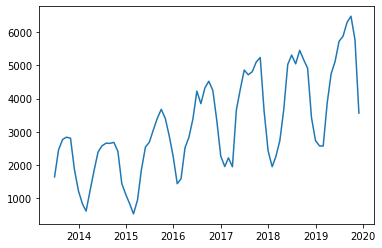

In [92]:
plt.plot(df_monthly.index, df_monthly['tripcnt'])

Text(0, 0.5, 'birth year of cyclist')

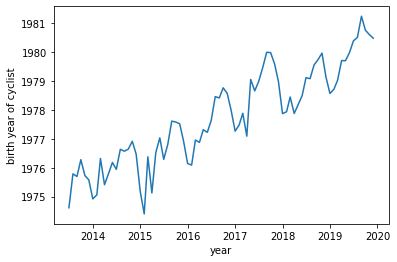

In [93]:
plt.plot(df_monthly.index, df_monthly['birthyear'])
plt.xlabel('year')
plt.ylabel('birth year of cyclist')

In [94]:
beg2014 = pd.Timestamp(2013, 12, 31)
end2014 = pd.Timestamp(2015, 1, 1)
monthly2014 = df_monthly[df_monthly.index < end2014]
monthly2014 = monthly2014[monthly2014.index > beg2014]

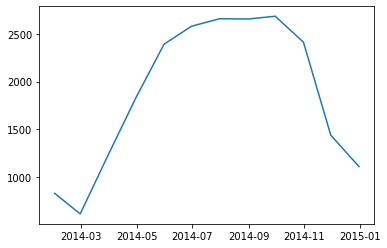

In [95]:
plt.plot(monthly2014.index, monthly2014['tripcnt'])

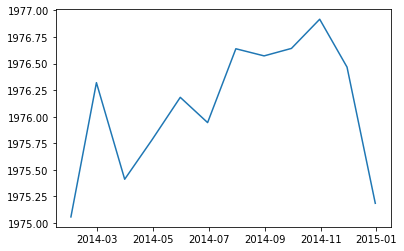

In [96]:
plt.plot(monthly2014.index, monthly2014['birthyear'])

In [97]:
nyellow = 8000000 #number of records in file
filename = 'nyc_yellow_taxi.csv'
skip = sorted(random.sample(range(nyellow),nyellow-s))
skip.pop(0)

0

In [98]:
df_yel = pd.read_csv(filename, skiprows=skip)

In [99]:
df_yel

pickup_datetime   dropoff_datetime  passenger_count  trip_distance  \
0       06-25-13 09:50:00  06-25-13 10:09:00                1           2.84   
1       06-01-13 17:27:01  06-01-13 17:34:25                1           1.40   
2       06-19-13 20:51:00  06-19-13 21:03:00                1           2.01   
3       06-06-13 10:57:50  06-06-13 11:13:56                3           1.50   
4       06-29-13 01:08:30  06-29-13 01:15:59                4           2.20   
...                   ...                ...              ...            ...   
264307  06-14-19 11:44:21  06-14-19 11:56:46                2           1.30   
264308  06-09-19 07:38:15  06-09-19 07:51:56                1           4.40   
264309  06-20-19 07:25:00  06-20-19 07:37:25                1           2.85   
264310  06-12-19 22:46:24  06-12-19 22:53:39                1           1.42   
264311  06-30-19 19:26:55  06-30-19 19:46:27                1           3.70   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.960547        40.760512         -73.991325   
1             -73.981214        40.768885         -73.988145   
2             -73.995972        40.740307         -73.976535   
3             -73.971943        40.781912         -73.984645   
4               0.000000         0.000000           0.000000   
...                  ...              ...                ...   
264307               NaN              NaN                NaN   
264308               NaN              NaN                NaN   
264309               NaN              NaN                NaN   
264310               NaN              NaN                NaN   
264311               NaN              NaN                NaN   

        dropoff_latitude  pickup_location_id  dropoff_location_id  \
0              40.751655                 NaN                  NaN   
1              40.758204                 NaN                  NaN   
2              40.752057                 NaN                  NaN   
3              40.766744                 NaN                  NaN   
4               0.000000                 NaN                  NaN   
...                  ...                 ...                  ...   
264307               NaN               170.0                113.0   
264308               NaN               263.0                113.0   
264309               NaN               236.0                161.0   
264310               NaN               114.0                170.0   
264311               NaN               163.0                226.0   

        total_amount  
0              18.50  
1               8.00  
2              12.50  
3              12.00  
4              12.00  
...              ...  
264307         12.30  
264308         20.47  
264309         15.88  
264310         13.50  
264311         24.30  

[264312 rows x 11 columns]

In [100]:
df_yel['pickup_datetime'] = pd.to_datetime(df_yel['pickup_datetime'])
df_yel['dropoff_datetime'] = pd.to_datetime(df_yel['dropoff_datetime'])
df_yel.dtypes

pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
trip_distance                 float64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
pickup_location_id            float64
dropoff_location_id           float64
total_amount                  float64
dtype: object

In [101]:
df_yel['date_minus_time'] = df_yel["pickup_datetime"].apply( lambda df1 : 
datetime(year=df1.year, month=df1.month, day=df1.day))	
df_yel.set_index(df_yel["date_minus_time"], inplace=True)

In [102]:
resampled_df_yel = pd.DataFrame()
resampled_df_yel['total_amount'] = df_yel['total_amount'].resample('D').mean()
resampled_df_yel['trip_distance'] = df_yel['trip_distance'].resample('D').mean()
resampled_df_yel['tripcnt_taxi'] = df_yel['total_amount'].resample('D').count()

In [103]:
resampled_df_yel

total_amount  trip_distance  tripcnt_taxi
date_minus_time                                           
2013-06-01          14.097965       2.849419           172
2013-06-02          14.746194       3.081343           134
2013-06-03          13.549710       2.440652           138
2013-06-04          13.108981       2.370255           157
2013-06-05          15.688808       2.813510           151
...                       ...            ...           ...
2019-06-26          21.651136       3.237186           590
2019-06-27          20.598287       3.053536           543
2019-06-28          20.753509       3.084412           587
2019-06-29          18.207309       2.818950           457
2019-06-30          20.658224       3.398934           366

[2221 rows x 3 columns]

In [104]:
resampled_df

tripduration    birthyear    gender  usertype  tripcnt
date_minus_time                                                        
2013-06-01        4402.666667  1975.000000  0.696970  0.636364       33
2013-06-02        2100.918367  1975.380952  0.530612  0.428571       49
2013-06-03        3156.615385  1968.529412  0.769231  0.653846       26
2013-06-04        1131.418605  1969.666667  0.651163  0.558140       43
2013-06-05        1368.852941  1970.850000  0.705882  0.588235       34
...                       ...          ...       ...       ...      ...
2019-11-22         688.500000  1980.688406  1.144928  0.942029      138
2019-11-23         815.354167  1978.895833  1.125000  0.864583       96
2019-11-24         688.565217  1980.652174  1.065217  0.826087       46
2019-11-25         625.905109  1979.510949  1.182482  0.927007      137
2019-11-26         806.835443  1979.145570  1.253165  0.924051      158

[2361 rows x 5 columns]

In [105]:
df_yel_bike = pd.concat([resampled_df, resampled_df_yel], axis=1, join='inner')

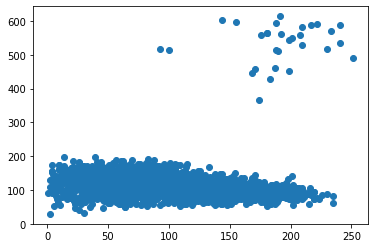

In [106]:
plt.plot(df_yel_bike['tripcnt'], df_yel_bike['tripcnt_taxi'], 'o')

In [107]:
df_yel_bike = df_yel_bike[df_yel_bike['tripcnt_taxi'] < 200]

Text(0, 0.5, 'taxi trip counts')

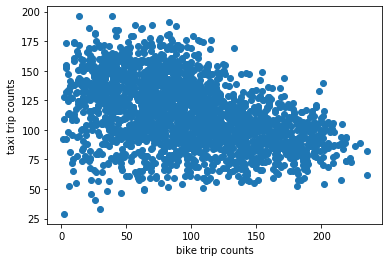

In [108]:
plt.plot(df_yel_bike['tripcnt'], df_yel_bike['tripcnt_taxi'], 'o')
plt.xlabel('bike trip counts')
plt.ylabel('taxi trip counts')

In [109]:
cor = df_yel_bike['tripcnt'].corr(df_yel_bike['tripcnt_taxi'], 'pearson')

In [110]:
cor

-0.41175578128628126

In [111]:
ngreen = 3800000 #number of records in file
filename = 'nyc_green_taxi.csv'
skip = sorted(random.sample(range(ngreen),ngreen-s))
skip.pop(0)

0

In [112]:
df_gr = pd.read_csv(filename, skiprows=skip)

In [113]:
df_gr

pickup_datetime   dropoff_datetime  passenger_count  trip_distance  \
0       08-22-13 00:20:45  08-22-13 00:34:36                6           2.73   
1       08-26-13 01:10:42  08-26-13 01:16:01                2           2.01   
2       08-28-13 08:44:34  08-28-13 09:07:18                5           3.48   
3       08-28-13 14:31:52  08-28-13 14:39:34                1           1.19   
4       08-22-13 11:54:00  08-22-13 11:57:20                1           0.00   
...                   ...                ...              ...            ...   
275654  06-06-19 15:26:11  06-06-19 15:37:58                1           3.20   
275655  06-15-19 22:45:07  06-15-19 23:03:23                2           4.00   
275656  06-29-19 16:42:47  06-29-19 17:03:05                1           4.49   
275657  06-06-19 18:42:22  06-06-19 18:53:00                1           2.30   
275658  06-21-19 20:04:53  06-21-19 20:05:12                1           0.00   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.954346        40.730366         -73.925476   
1             -73.831635        40.715004         -73.803452   
2             -73.958191        40.800896         -73.963814   
3             -73.917053        40.761478         -73.913673   
4             -73.992744        40.762821         -73.993843   
...                  ...              ...                ...   
275654               NaN              NaN                NaN   
275655               NaN              NaN                NaN   
275656               NaN              NaN                NaN   
275657               NaN              NaN                NaN   
275658               NaN              NaN                NaN   

        dropoff_latitude  pickup_location_id  dropoff_location_id  \
0              40.698238                 NaN                  NaN   
1              40.717739                 NaN                  NaN   
2              40.761509                 NaN                  NaN   
3              40.774967                 NaN                  NaN   
4              40.763214                 NaN                  NaN   
...                  ...                 ...                  ...   
275654               NaN               129.0                138.0   
275655               NaN               181.0                255.0   
275656               NaN               196.0                  7.0   
275657               NaN                40.0                257.0   
275658               NaN                25.0                 25.0   

        total_amount  trip_type  
0               12.5        NaN  
1                9.0        NaN  
2               17.5        NaN  
3                7.5        NaN  
4                4.0        NaN  
...              ...        ...  
275654          12.3        1.0  
275655          17.8        1.0  
275656          18.3        1.0  
275657          11.3        1.0  
275658          16.5        2.0  

[275659 rows x 12 columns]

In [114]:
df_gr['pickup_datetime'] = pd.to_datetime(df_gr['pickup_datetime'])
df_gr['dropoff_datetime'] = pd.to_datetime(df_gr['dropoff_datetime'])
df_gr.dtypes

pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
trip_distance                 float64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
pickup_location_id            float64
dropoff_location_id           float64
total_amount                  float64
trip_type                     float64
dtype: object

In [115]:
df_gr['date_minus_time'] = df_gr["pickup_datetime"].apply( lambda df1 : 
datetime(year=df1.year, month=df1.month, day=df1.day))	
df_gr.set_index(df_gr["date_minus_time"], inplace=True)

In [116]:
resampled_df_gr = pd.DataFrame()
resampled_df_gr['total_amount_gr'] = df_gr['total_amount'].resample('D').mean()
resampled_df_gr['trip_distance_gr'] = df_gr['trip_distance'].resample('D').mean()
resampled_df_gr['tripcnt_gr'] = df_gr['total_amount'].resample('D').count()

In [117]:
resampled_df_gr

total_amount_gr  trip_distance_gr  tripcnt_gr
date_minus_time                                               
2008-12-31             29.430000          7.130000           2
2009-01-01             13.050000          2.885000           2
2009-01-02                   NaN               NaN           0
2009-01-03                   NaN               NaN           0
2009-01-04                   NaN               NaN           0
...                          ...               ...         ...
2019-06-26             16.194656          2.871765         799
2019-06-27             16.157859          2.806136         766
2019-06-28             16.280272          2.935601         882
2019-06-29             15.153970          2.762697         864
2019-06-30             15.025527          2.866443         655

[3834 rows x 3 columns]

In [118]:
df_yel_gr_bike = pd.concat([df_yel_bike, resampled_df_gr], axis=1, join='inner')
df_yel_gr_bike

tripduration    birthyear    gender  usertype  tripcnt  \
date_minus_time                                                           
2013-06-01        4402.666667  1975.000000  0.696970  0.636364       33   
2013-06-02        2100.918367  1975.380952  0.530612  0.428571       49   
2013-06-03        3156.615385  1968.529412  0.769231  0.653846       26   
2013-06-04        1131.418605  1969.666667  0.651163  0.558140       43   
2013-06-05        1368.852941  1970.850000  0.705882  0.588235       34   
...                       ...          ...       ...       ...      ...   
2019-05-27        1331.651934  1980.977901  1.093923  0.591160      181   
2019-05-28         820.876404  1980.303371  1.196629  0.887640      178   
2019-05-29        1252.651852  1978.733333  1.214815  0.933333      135   
2019-05-30         820.514493  1979.384058  1.181159  0.927536      138   
2019-05-31         875.940367  1979.954128  1.119266  0.857798      218   

                 total_amount  trip_distance  tripcnt_taxi  total_amount_gr  \
date_minus_time                                                               
2013-06-01          14.097965       2.849419           172              NaN   
2013-06-02          14.746194       3.081343           134              NaN   
2013-06-03          13.549710       2.440652           138              NaN   
2013-06-04          13.108981       2.370255           157              NaN   
2013-06-05          15.688808       2.813510           151              NaN   
...                       ...            ...           ...              ...   
2019-05-27          19.212642       3.423962            53        18.014684   
2019-05-28          15.387077       1.848462            65        15.507460   
2019-05-29          19.769855       2.897246            69        16.571134   
2019-05-30          21.611786       3.609048            84        16.050776   
2019-05-31          19.086517       3.200899            89        16.014394   

                 trip_distance_gr  tripcnt_gr  
date_minus_time                                
2013-06-01                    NaN           0  
2013-06-02                    NaN           0  
2013-06-03                    NaN           0  
2013-06-04                    NaN           0  
2013-06-05                    NaN           0  
...                           ...         ...  
2019-05-27               3.661772          79  
2019-05-28               3.045794         126  
2019-05-29               3.055464          97  
2019-05-30               2.937586         116  
2019-05-31               2.963712         132  

[2182 rows x 11 columns]

In [119]:
df_yel_gr_bike['tripcnt_taxi'] += df_yel_gr_bike['tripcnt_gr']
df_yel_gr_bike

tripduration    birthyear    gender  usertype  tripcnt  \
date_minus_time                                                           
2013-06-01        4402.666667  1975.000000  0.696970  0.636364       33   
2013-06-02        2100.918367  1975.380952  0.530612  0.428571       49   
2013-06-03        3156.615385  1968.529412  0.769231  0.653846       26   
2013-06-04        1131.418605  1969.666667  0.651163  0.558140       43   
2013-06-05        1368.852941  1970.850000  0.705882  0.588235       34   
...                       ...          ...       ...       ...      ...   
2019-05-27        1331.651934  1980.977901  1.093923  0.591160      181   
2019-05-28         820.876404  1980.303371  1.196629  0.887640      178   
2019-05-29        1252.651852  1978.733333  1.214815  0.933333      135   
2019-05-30         820.514493  1979.384058  1.181159  0.927536      138   
2019-05-31         875.940367  1979.954128  1.119266  0.857798      218   

                 total_amount  trip_distance  tripcnt_taxi  total_amount_gr  \
date_minus_time                                                               
2013-06-01          14.097965       2.849419           172              NaN   
2013-06-02          14.746194       3.081343           134              NaN   
2013-06-03          13.549710       2.440652           138              NaN   
2013-06-04          13.108981       2.370255           157              NaN   
2013-06-05          15.688808       2.813510           151              NaN   
...                       ...            ...           ...              ...   
2019-05-27          19.212642       3.423962           132        18.014684   
2019-05-28          15.387077       1.848462           191        15.507460   
2019-05-29          19.769855       2.897246           166        16.571134   
2019-05-30          21.611786       3.609048           200        16.050776   
2019-05-31          19.086517       3.200899           221        16.014394   

                 trip_distance_gr  tripcnt_gr  
date_minus_time                                
2013-06-01                    NaN           0  
2013-06-02                    NaN           0  
2013-06-03                    NaN           0  
2013-06-04                    NaN           0  
2013-06-05                    NaN           0  
...                           ...         ...  
2019-05-27               3.661772          79  
2019-05-28               3.045794         126  
2019-05-29               3.055464          97  
2019-05-30               2.937586         116  
2019-05-31               2.963712         132  

[2182 rows x 11 columns]

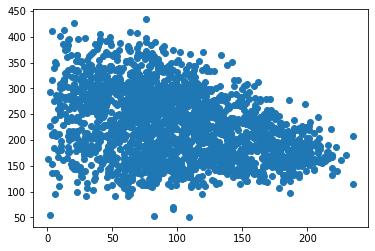

In [120]:
plt.plot(df_yel_gr_bike['tripcnt'], df_yel_gr_bike['tripcnt_taxi'], 'o')

In [121]:
cor_yg = df_yel_gr_bike['tripcnt'].corr(df_yel_gr_bike['tripcnt_taxi'], 'pearson')

In [122]:
cor_yg

-0.3416425189252602

In [123]:
nrideshare = 16000000 #number of records in file
filename = 'nyc_rideshare.csv'
skip = sorted(random.sample(range(nrideshare),nrideshare-s))
skip.pop(0)

df_rs = pd.read_csv(filename, skiprows=skip)

df_rs['pickup_datetime'] = pd.to_datetime(df_rs['pickup_datetime'])

df_rs['date_minus_time'] = df_rs["pickup_datetime"].apply( lambda df1 : 
datetime(year=df1.year, month=df1.month, day=df1.day))	
df_rs.set_index(df_rs["date_minus_time"], inplace=True)

resampled_df_rs = pd.DataFrame()
resampled_df_rs['tripcnt_rs'] = df_rs['provider'].resample('D').count()

resampled_df_rs

tripcnt_rs
date_minus_time            
2015-01-01               18
2015-01-02                9
2015-01-03               23
2015-01-04               17
2015-01-05               17
...                     ...
2019-06-26            13375
2019-06-27            13661
2019-06-28            15050
2019-06-29            16620
2019-06-30            13518

[1642 rows x 1 columns]

In [124]:
df_yel_gr_bike_rs = pd.concat([df_yel_gr_bike, resampled_df_rs], axis=1, join='inner')
df_yel_gr_bike_rs

tripduration    birthyear    gender  usertype  tripcnt  \
date_minus_time                                                           
2015-01-01         489.214286  1972.363636  1.000000  0.785714       14   
2015-01-02         757.350000  1977.105263  1.225000  0.950000       40   
2015-01-03         630.500000  1973.000000  1.142857  1.000000       14   
2015-01-04         832.250000  1975.304348  1.166667  0.958333       24   
2015-01-05         533.157895  1975.527778  1.131579  0.947368       38   
...                       ...          ...       ...       ...      ...   
2019-05-27        1331.651934  1980.977901  1.093923  0.591160      181   
2019-05-28         820.876404  1980.303371  1.196629  0.887640      178   
2019-05-29        1252.651852  1978.733333  1.214815  0.933333      135   
2019-05-30         820.514493  1979.384058  1.181159  0.927536      138   
2019-05-31         875.940367  1979.954128  1.119266  0.857798      218   

                 total_amount  trip_distance  tripcnt_taxi  total_amount_gr  \
date_minus_time                                                               
2015-01-01          15.280632       3.380842           329        15.543205   
2015-01-02          15.378000       3.361091           240        13.828615   
2015-01-03          15.235565       3.064194           283        14.660314   
2015-01-04          18.472621       3.936796           245        12.915493   
2015-01-05          16.311468       3.370275           258        12.488188   
...                       ...            ...           ...              ...   
2019-05-27          19.212642       3.423962           132        18.014684   
2019-05-28          15.387077       1.848462           191        15.507460   
2019-05-29          19.769855       2.897246           166        16.571134   
2019-05-30          21.611786       3.609048           200        16.050776   
2019-05-31          19.086517       3.200899           221        16.014394   

                 trip_distance_gr  tripcnt_gr  tripcnt_rs  
date_minus_time                                            
2015-01-01               3.387735         234          18  
2015-01-02               2.804923         130           9  
2015-01-03               2.921321         159          23  
2015-01-04               2.577465         142          17  
2015-01-05               2.382819         149          17  
...                           ...         ...         ...  
2019-05-27               3.661772          79         230  
2019-05-28               3.045794         126         250  
2019-05-29               3.055464          97         252  
2019-05-30               2.937586         116         293  
2019-05-31               2.963712         132         300  

[1603 rows x 12 columns]

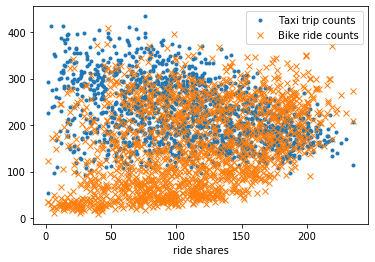

In [125]:
plt.plot(df_yel_gr_bike_rs['tripcnt'], df_yel_gr_bike_rs['tripcnt_taxi'], '.', label = "Taxi trip counts")
plt.plot(df_yel_gr_bike_rs['tripcnt'], df_yel_gr_bike_rs['tripcnt_rs'], 'x', label = "Bike ride counts")
plt.xlabel("ride shares")
plt.legend()

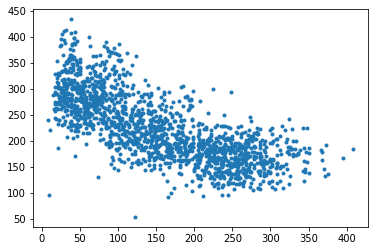

In [126]:
plt.plot(df_yel_gr_bike_rs['tripcnt_rs'], df_yel_gr_bike_rs['tripcnt_taxi'], '.')

In [127]:
cor_rs_taxi = df_yel_gr_bike_rs['tripcnt_rs'].corr(df_yel_gr_bike_rs['tripcnt_taxi'], 'pearson')
cor_rs_taxi

-0.7371344242750386

In [128]:
cor_rs_bike = df_yel_gr_bike_rs['tripcnt_rs'].corr(df_yel_gr_bike_rs['tripcnt'], 'pearson')
cor_rs_bike

0.3490250064868154

In [129]:
cor_taxi_bike = df_yel_gr_bike_rs['tripcnt'].corr(df_yel_gr_bike_rs['tripcnt_taxi'], 'pearson')
cor_taxi_bike

-0.38284885909516675

(array([735599., 735780., 735964., 736146., 736330., 736511., 736695.,
        736876., 737060., 737241.]), <a list of 10 Text xticklabel objects>)

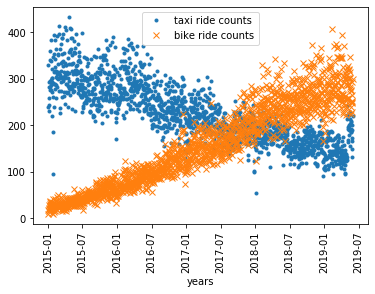

In [130]:
plt.plot(df_yel_gr_bike_rs.index, df_yel_gr_bike_rs['tripcnt_taxi'], '.', label = 'taxi ride counts')
plt.plot(df_yel_gr_bike_rs.index, df_yel_gr_bike_rs['tripcnt_rs'], 'x', label = 'bike ride counts')
plt.xlabel('years')
plt.legend()
plt.xticks(rotation=90)

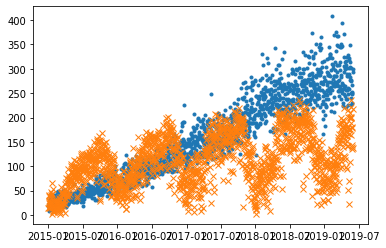

In [131]:
plt.plot(df_yel_gr_bike_rs.index, df_yel_gr_bike_rs['tripcnt_rs'], '.')
plt.plot(df_yel_gr_bike_rs.index, df_yel_gr_bike_rs['tripcnt'], 'x')

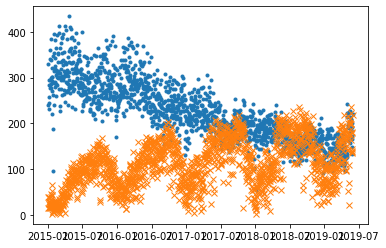

In [132]:
plt.plot(df_yel_gr_bike_rs.index, df_yel_gr_bike_rs['tripcnt_taxi'], '.')
plt.plot(df_yel_gr_bike_rs.index, df_yel_gr_bike_rs['tripcnt'], 'x')

In [133]:
#now do linear wrt year and sin() wrt season

In [134]:
df_annual_bike = pd.DataFrame()
df_annual_bike['tripduration'] = resampled_df['tripduration'].resample('Y').mean()
df_annual_bike['birthyear'] = resampled_df['birthyear'].resample('Y').mean()
df_annual_bike['gender'] = resampled_df['gender'].resample('Y').mean() #mode()
df_annual_bike['usertype'] = resampled_df['usertype'].resample('Y').mean()
df_annual_bike['tripcnt'] = resampled_df['tripcnt'].resample('Y').sum()
df_annual_bike

tripduration    birthyear    gender  usertype  tripcnt
date_minus_time                                                        
2013-12-31        1009.783271  1975.516122  1.029223  0.835462    15613
2014-12-31         863.131389  1976.090417  1.119741  0.916128    22437
2015-12-31         938.951515  1976.527114  1.079466  0.886368    28074
2016-12-31         989.136305  1977.651020  1.096033  0.894170    38579
2017-12-31         963.985313  1978.772194  1.128711  0.901455    44832
2018-12-31         886.381455  1978.846665  1.153541  0.901427    47677
2019-12-31         909.450837  1980.109339  1.160711  0.870157    52600

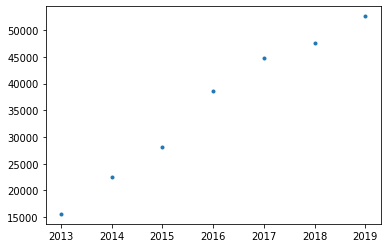

In [135]:
plt.plot(df_annual_bike.index.year, df_annual_bike['tripcnt'], '.')

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
reg = LinearRegression().fit((np.array(df_annual_bike.index.year) - 2013).reshape(-1, 1), df_annual_bike['tripcnt'])

In [138]:
print(reg.score((np.array(df_annual_bike.index.year) - 2013).reshape(-1, 1), df_annual_bike['tripcnt']))
print(reg.coef_)
print(reg.intercept_)
model_res = reg.coef_[0] * np.arange(7) + reg.intercept_
print(model_res)

0.9791182572237401
[6364.25]
16594.678571428576
[16594.67857143 22958.92857143 29323.17857143 35687.42857143
 42051.67857143 48415.92857143 54780.17857143]


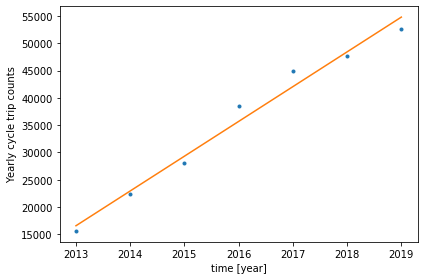

In [139]:
fig, ax1 = plt.subplots()
df_annual_bike['predictions'] = model_res
ax1.set_xlabel('time [year]')
ax1.set_ylabel('Yearly cycle trip counts')
ax1.plot(df_annual_bike.index.year, df_annual_bike['tripcnt'], '.')
ax1.plot(df_annual_bike.index.year, df_annual_bike['predictions'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [140]:
bike_oscillations = pd.DataFrame()
date_before = pd.Timestamp(2013, 1, 1)
bike_oscillations['tripcnt'] = resampled_df['tripcnt'] - (pd.to_datetime(resampled_df.index) - pd.to_datetime(date_before)).total_seconds() * reg.coef_[0] / 365 / 24 / 3600 / 365 - reg.intercept_ / 365 / 24 / 3600 / 365  
(pd.to_datetime(resampled_df.index) - pd.to_datetime(date_before)).total_seconds()  / 24 / 3600 /365

Float64Index([ 0.4136986301369863, 0.41643835616438357,  0.4191780821917808,
              0.42191780821917807,  0.4246575342465753,  0.4273972602739726,
               0.4301369863013699,  0.4328767123287671, 0.43561643835616437,
               0.4383561643835616,
              ...
                6.879452054794521,   6.882191780821918,   6.884931506849315,
                6.887671232876713,   6.890410958904109,  6.8931506849315065,
                6.895890410958904,   6.898630136986301,   6.901369863013699,
                6.904109589041096],
             dtype='float64', name='date_minus_time', length=2361)

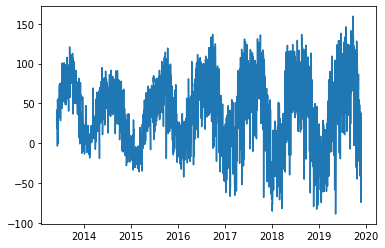

In [141]:
plt.plot(bike_oscillations.index, bike_oscillations['tripcnt'])

In [142]:
from scipy import optimize

In [143]:
def sine_wave(x, a, b, omega, phi, alpha):
    return a * np.exp(alpha * x) * np.sin(omega * x + phi) + b

In [144]:
x_data = (pd.to_datetime(resampled_df.index) - pd.to_datetime(date_before)).total_seconds()  / 24 / 3600 
y_data = bike_oscillations['tripcnt']

params, params_covariance = optimize.curve_fit(sine_wave, x_data, y_data,
                                               p0=[25, 20, 2 * np.pi / 365, 0, 1/500])

In [145]:
params, params_covariance

(array([-3.10405002e+01,  3.98834616e+01,  1.73620192e-02,  7.75720296e-01,
         2.52684810e-04]),
 array([[ 2.59490917e+00,  2.67217795e-02, -8.31877714e-07,
          2.02677587e-03,  4.57675551e-05],
        [ 2.67217795e-02,  4.08876749e-01,  4.60942363e-07,
         -3.34445905e-04, -4.46001251e-09],
        [-8.31877714e-07,  4.60942363e-07,  9.02193466e-10,
         -1.43301070e-06, -8.61942595e-12],
        [ 2.02677587e-03, -3.34445905e-04, -1.43301070e-06,
          2.67437096e-03,  2.85529609e-08],
        [ 4.57675551e-05, -4.46001251e-09, -8.61942595e-12,
          2.85529609e-08,  9.53947898e-10]]))

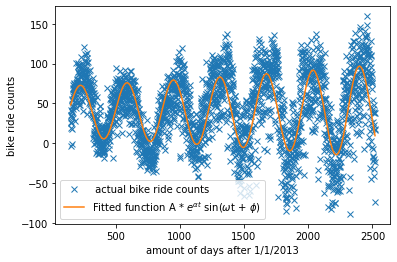

In [158]:
plt.plot(x_data, y_data, 'x', label = ' actual bike ride counts')
plt.xlabel('amount of days after 1/1/2013')
plt.ylabel('bike ride counts')
plt.plot(x_data, sine_wave(x_data, params[0], params[1], params[2], params[3], params[4]),
         label='Fitted function A * $e^{αt}$ sin($\omega$t + $\phi$)')
plt.legend()

In [159]:
reg.predict(np.array([10]).reshape(-1,1)) # total rides in 2023

array([80237.17857143])

In [160]:
print(abs(params[0] * np.exp(11 * 365 * params[4]))) #Amplitude of daily ride oscillations in 2023

85.61173130131232


In [184]:
filename = 'weather.csv'

df_w = pd.read_csv(filename)

#df_w['date'] = pd.to_datetime(df_rs['date'])

df_rs['date_minus_time'] = df_rs["pickup_datetime"].apply( lambda df1 : 
datetime(year=df1.year, month=df1.month, day=df1.day))	
df_rs.set_index(df_rs["date_minus_time"], inplace=True)

In [185]:
df_w['DATE'] = pd.to_datetime(df_w['DATE'])

df_w['date_minus_time'] = df_w["DATE"].apply( lambda df1 : 
datetime(year=df1.year, month=df1.month, day=df1.day))
df_w.set_index(df_w["date_minus_time"], inplace=True)

In [186]:
df_temp = df_w[df_w['MonthlyMeanTemperature'].notnull()]

In [187]:
df_temp

DATE REPORT_TYPE  \
date_minus_time                                   
2013-01-31      2013-01-31 23:59:00       SOM     
2013-02-28      2013-02-28 23:59:00       SOM     
2013-03-31      2013-03-31 23:59:00       SOM     
2013-04-30      2013-04-30 23:59:00       SOM     
2013-05-31      2013-05-31 23:59:00       SOM     
...                             ...         ...   
2019-07-31      2019-07-31 23:59:00       SOM     
2019-08-31      2019-08-31 23:59:00       SOM     
2019-09-30      2019-09-30 23:59:00       SOM     
2019-10-31      2019-10-31 23:59:00       SOM     
2019-11-30      2019-11-30 23:59:00       SOM     

                 DailyAverageDewPointTemperature  \
date_minus_time                                    
2013-01-31                                   NaN   
2013-02-28                                   NaN   
2013-03-31                                   NaN   
2013-04-30                                   NaN   
2013-05-31                                   NaN   
...                                          ...   
2019-07-31                                   NaN   
2019-08-31                                   NaN   
2019-09-30                                   NaN   
2019-10-31                                   NaN   
2019-11-30                                   NaN   

                 DailyAverageDryBulbTemperature  \
date_minus_time                                   
2013-01-31                                  NaN   
2013-02-28                                  NaN   
2013-03-31                                  NaN   
2013-04-30                                  NaN   
2013-05-31                                  NaN   
...                                         ...   
2019-07-31                                  NaN   
2019-08-31                                  NaN   
2019-09-30                                  NaN   
2019-10-31                                  NaN   
2019-11-30                                  NaN   

                 DailyAverageWetBulbTemperature  DailyAverageWindSpeed  \
date_minus_time                                                          
2013-01-31                                  NaN                    NaN   
2013-02-28                                  NaN                    NaN   
2013-03-31                                  NaN                    NaN   
2013-04-30                                  NaN                    NaN   
2013-05-31                                  NaN                    NaN   
...                                         ...                    ...   
2019-07-31                                  NaN                    NaN   
2019-08-31                                  NaN                    NaN   
2019-09-30                                  NaN                    NaN   
2019-10-31                                  NaN                    NaN   
2019-11-30                                  NaN                    NaN   

                 DailyMaximumDryBulbTemperature  \
date_minus_time                                   
2013-01-31                                  NaN   
2013-02-28                                  NaN   
2013-03-31                                  NaN   
2013-04-30                                  NaN   
2013-05-31                                  NaN   
...                                         ...   
2019-07-31                                  NaN   
2019-08-31                                  NaN   
2019-09-30                                  NaN   
2019-10-31                                  NaN   
2019-11-30                                  NaN   

                 DailyMinimumDryBulbTemperature  DailyPeakWindSpeed  \
date_minus_time                                                       
2013-01-31                                  NaN                 NaN   
2013-02-28                                  NaN                 NaN   
2013-03-31                                  NaN                 NaN   
2013-04-30                                  

In [188]:
df_temp_cnt = pd.concat([df_monthly, df_temp], axis=1, join='inner')

In [189]:
df_temp_cnt

tripduration    birthyear    gender  usertype  tripcnt  \
date_minus_time                                                           
2013-06-30        2013.403824  1974.613806  0.708417  0.588866     1644   
2013-07-31         999.071457  1975.787243  0.984031  0.790951     2457   
2013-08-31         963.143343  1975.697590  1.011883  0.814616     2770   
2013-09-30         947.109297  1976.279654  1.065092  0.855157     2839   
2013-10-31         797.992801  1975.729851  1.129002  0.904525     2809   
...                       ...          ...       ...       ...      ...   
2019-07-31        1022.160402  1980.519837  1.146802  0.822569     5881   
2019-08-31        1024.696629  1981.246646  1.157328  0.808079     6296   
2019-09-30         933.527428  1980.765729  1.172959  0.814121     6479   
2019-10-31         910.503180  1980.609271  1.181048  0.859303     5764   
2019-11-30         744.793688  1980.486699  1.163061  0.901562     3565   

                               DATE REPORT_TYPE  \
date_minus_time                                   
2013-06-30      2013-06-30 23:59:00       SOM     
2013-07-31      2013-07-31 23:59:00       SOM     
2013-08-31      2013-08-31 23:59:00       SOM     
2013-09-30      2013-09-30 23:59:00       SOM     
2013-10-31      2013-10-31 23:59:00       SOM     
...                             ...         ...   
2019-07-31      2019-07-31 23:59:00       SOM     
2019-08-31      2019-08-31 23:59:00       SOM     
2019-09-30      2019-09-30 23:59:00       SOM     
2019-10-31      2019-10-31 23:59:00       SOM     
2019-11-30      2019-11-30 23:59:00       SOM     

                 DailyAverageDewPointTemperature  \
date_minus_time                                    
2013-06-30                                   NaN   
2013-07-31                                   NaN   
2013-08-31                                   NaN   
2013-09-30                                   NaN   
2013-10-31                                   NaN   
...                                          ...   
2019-07-31                                   NaN   
2019-08-31                                   NaN   
2019-09-30                                   NaN   
2019-10-31                                   NaN   
2019-11-30                                   NaN   

                 DailyAverageDryBulbTemperature  \
date_minus_time                                   
2013-06-30                                  NaN   
2013-07-31                                  NaN   
2013-08-31                                  NaN   
2013-09-30                                  NaN   
2013-10-31                                  NaN   
...                                         ...   
2019-07-31                                  NaN   
2019-08-31                                  NaN   
2019-09-30                                  NaN   
2019-10-31                                  NaN   
2019-11-30                                  NaN   

                 DailyAverageWetBulbTemperature  ...  MonthlyGreatestSnowfall  \
date_minus_time                                  ...                            
2013-06-30                                  NaN  ...                      0.0   
2013-07-31                                  NaN  ...                      0.0   
2013-08-31                                  NaN  ...                      0.0   
2013-09-30                                  NaN  ...                      0.0   
2013-10-31                                  NaN  ...                      0.0   
...                                         ...  ...                      ...   
2019-07-31                                  NaN  ...                      0.0   
2019-08-31                                  NaN  ...                      0.0   
2019-09-30                                  NaN  ...                      0.0   
2019-10-31                                  NaN  ...                      0.0   
2019-11-30                                  NaN  ...            

In [190]:
cor_temp_counts = df_temp_cnt['tripcnt'].corr(df_temp_cnt['MonthlyMeanTemperature'], 'pearson')

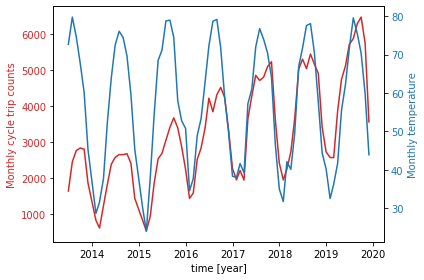

In [191]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time [year]')
ax1.set_ylabel('Monthly cycle trip counts', color=color)
ax1.plot(df_temp_cnt.index, df_temp_cnt['tripcnt'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Monthly temperature', color=color)  # we already handled the x-label with ax1
ax2.plot(df_temp_cnt.index, df_temp_cnt['MonthlyMeanTemperature'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [192]:
cor_temp_counts

0.643216689455909